# Comparing NN-Predicted Q1 and Q2 Distribution to True Q1 and Q2 Distrbituion

This notebook compares the output of the distribution of the neural network to the true distribution of the q1 and q2. It demonstrates a motive for stochastic parameterization, as the neural network produces outputs with less than half of the variance as the true distribution. A stochastic scheme should produce a distribution that on a whole matches the true distribution. After this is accomplished, the next step is to generate a stochastic scheme that generates similar distributions to the true outputs given the current state, as the distribution of Q1 and Q2 depend on state. 

In [1]:
from matplotlib import pyplot as plt
import numpy
from stewart_intro.utils import load_model, model_name
from stewart_intro.evaluate_model import get_predicted_q1_and_q2
from stewart_intro.generate_training_data import get_layer_mass

mlp = load_model(model_name)
q1_trues, q2_trues, q1_preds, q2_preds = get_predicted_q1_and_q2(mlp)
layer_mass = get_layer_mass()

In [2]:
# Compare the mean and variance of the NN output to the true mean and variance. 
def get_mass_weighted_qs(qs):
    return ((qs * layer_mass) / layer_mass.sum()).mean(axis=1)

print(f'Q1 True mean: {get_mass_weighted_qs(q1_trues).mean()}')
print(f'Q1 Pred mean: {get_mass_weighted_qs(q1_preds).mean()}')
print(f'Q1 True var: {get_mass_weighted_qs(q1_trues).var()}')
print(f'Q1 Pred var: {get_mass_weighted_qs(q1_preds).var()}')

print(f'\n\n\nQ2 True mean: {get_mass_weighted_qs(q2_trues).mean()}')
print(f'Q2 Pred mean: {get_mass_weighted_qs(q2_preds).mean()}')
print(f'Q2 True var: {get_mass_weighted_qs(q2_trues).var()}')
print(f'Q2 Pred var: {get_mass_weighted_qs(q2_preds).var()}')

Q1 True mean: 0.006165966439879961
Q1 Pred mean: 0.0064689184556415095
Q1 True var: 0.0004693085357642314
Q1 Pred var: 0.00022909635557609575



Q2 True mean: -0.0019341817326872853
Q2 Pred mean: -0.0025869175390968962
Q2 True var: 7.453506610609102e-05
Q2 Pred var: 3.0199518843230942e-05


The variance comparison shows what we expect: the NN predictions are closer to the mean than the true distribution, so the predictions are not extreme enough. 

The mean comparisons highlight a different issue: especially for Q2, the NN output is biased. These are on a sample of the 30,000 data points, so there could be some outliers that heavily affect the NN, or some other issue. This should be addressed separately.

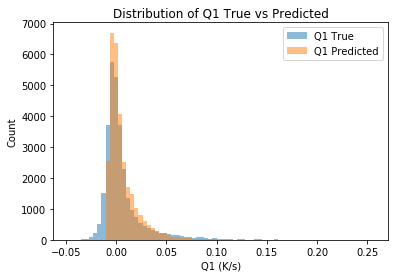

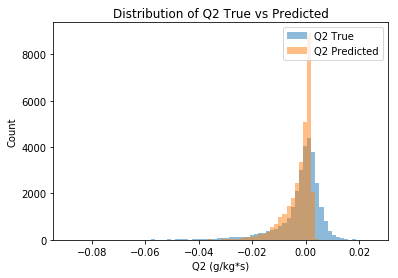

In [5]:
# Plot the distribution of true Q1 and Q2 vs the NN output Q1 and Q2 distribution.
%matplotlib inline
def plot_true_vs_predicted_distribution(
        q_true,
        q_pred,
        name_,
        units):
    q_true_mass_weighted = get_mass_weighted_qs(q_true)
    q_pred_mass_weighted = get_mass_weighted_qs(q_pred)
    left_limit = min(
        q_true_mass_weighted.min(),
        q_pred_mass_weighted.min()
    )
    right_limit = max(
        q_true_mass_weighted.max(),
        q_pred_mass_weighted.max()
    )

    bins = numpy.linspace(left_limit, right_limit, 75)

    plt.hist(q_true_mass_weighted, bins, alpha=0.5, label=f'Q{name_} True')
    plt.hist(
        q_pred_mass_weighted, bins, alpha=0.5, label=f'Q{name_} Predicted')
    plt.legend(loc='upper right')
    plt.title(f'Distribution of Q{name_} True vs Predicted')
    plt.ylabel('Count')
    plt.xlabel(f'Q{name_} ({units})')
    plt.show()
    
plot_true_vs_predicted_distribution(
    q1_trues, q1_preds, '1', 'K/s')
plot_true_vs_predicted_distribution(
    q2_trues, q2_preds, '2', 'g/kg*s')